## Integrating a simple harmonic oscillator and trying to fit for the spring constant

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
import scipy.optimize as so
%matplotlib inline

In [57]:
def leapfrog(x0, v0, phi_grad, dt, nsteps, *args, **kwargs):
    #function that takes initial conditions that takes us to the next position 
    v0_5 = v0 + phi_grad(x0, *args, **kwargs)*dt/2.
    x = np.zeros(nsteps+1)
    v = np.zeros(nsteps+1)
    t = np.zeros(nsteps+1)
    x[0] = x0
    v[0] = v0
    t[0] = 0
    for i in range(nsteps):
        x[i+1] = x[i] + dt*v0_5
        a      = -phi_grad(x[i+1], *args, **kwargs)
        v[i+1] = v0_5 + a*dt/2
        v0_5   = v0_5 + a*dt
        t[i+1] = t[i] + dt
    return x, v, t

In [3]:
def phi_grad(x, k=1):
    return k*x

In [62]:
def genData(x, v, t, npoints, std_noise):
    randind = np.random.choice(len(x), npoints, replace=False)
    noise_x = np.random.normal(0, std_noise, len(randind))
    noise_v = np.random.normal(0, std_noise, len(randind))
    return noise_x + x[randind], noise_v + v[randind], t[randind]

In [122]:
x0_true = 0
v0_true = 100
dt = 0.1
nsteps = 100
npoints = 10
std_noise = 1.0
k_true = 10
dt_model = 0.01

p_true = [k_true, x0_true, v0_true]

In [123]:
x, v, t = leapfrog(x0_true, v0_true, phi_grad, dt, nsteps, k=k_true)
x_obs, v_obs, t_obs = genData(x, v, t, npoints, std_noise)

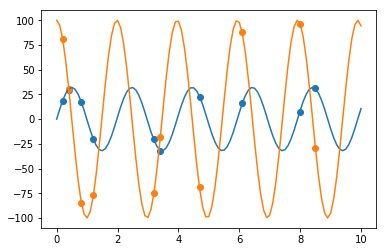

In [124]:
plt.plot(t, x)
plt.plot(t, v)
plt.scatter(t_obs, x_obs)
plt.scatter(t_obs, v_obs)

In [125]:
def ln_likelihood(theta, data, dt_model, nsteps=100):
    chi2 = 0
    k, x0, v0 = theta
    x_obs, v_obs, t_obs, sigma_x, sigma_v = data
    x, v, t = leapfrog(x0, v0, phi_grad, dt_model, nsteps, k=k)
    #interpolate between values and sample at observed t
    order = 3
    v_interp = InterpolatedUnivariateSpline(t, v, k=order)
    x_interp = InterpolatedUnivariateSpline(t, x, k=order)
    chi2 += -(v_interp(t_obs) - v_obs)**2 / sigma_v**2 - 2*np.log(sigma_v)
    chi2 += -(x_interp(t_obs) - x_obs)**2 / sigma_x**2 - 2*np.log(sigma_x)
    return 0.5*chi2.sum()

In [126]:
data = [x_obs, v_obs, t_obs, std_noise, std_noise]
p0 = [k_true*1.1, x0_true*1.1, v0_true*1.1]
args = (data, dt_model)
res = so.minimize(lambda *args : -ln_likelihood(*args),
                  x0=p0, method='Powell', args=args) #, options={'maxiter': 1, 'disp': True, 'maxfev':1})


In [127]:
print('The true values are: k = {0:0.2f}, x0 = {1:0.2f}, v0 = {2:0.2f}'.format(k_true, x0_true, v0_true))
print('The optimized values are: k = {0:0.2f}, x0 = {1:0.2f}, v0 = {2:0.2f}'.format(res.x[0], res.x[1], res.x[2]))


The true values are: k = 10.00, x0 = 0.00, v0 = 100.00
The optimized values are: k = 0.20, x0 = 11.80, v0 = -6.48


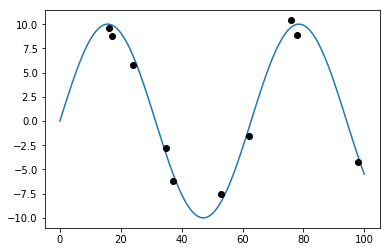

In [30]:
plt.plot(x)
plt.plot(randind, x_obs, 'ko')

In [ ]:
    order = 3
    # bbox = [-np.pi, np.pi]
    bbox = [-1, 1]
    phi2_interp = InterpolatedUnivariateSpline(model_x[ix], model_phi2[ix], k=order, bbox=bbox) # change bbox to units of model_x
